In [1]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading both train and test datasets
Data1 = pd.read_csv('Surveydata_train.csv')
Data2 = pd.read_csv('Traveldata_train.csv')
Data3 = pd.read_csv('Surveydata_test.csv')
Data4 = pd.read_csv('Traveldata_test.csv')

In [3]:
dfjoin1 = pd.merge(Data1, Data2, how='left', left_on= 'ID', right_on= 'ID')
dfjoin2 = pd.merge(Data3, Data4, how='left', left_on= 'ID', right_on= 'ID')


In [4]:
dfjoin1.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [5]:
dfjoin1_na = dfjoin1.dropna()
dfjoin1_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55503 entries, 1 to 94375
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       55503 non-null  int64  
 1   Overall_Experience       55503 non-null  int64  
 2   Seat_Comfort             55503 non-null  object 
 3   Seat_Class               55503 non-null  object 
 4   Arrival_Time_Convenient  55503 non-null  object 
 5   Catering                 55503 non-null  object 
 6   Platform_Location        55503 non-null  object 
 7   Onboard_Wifi_Service     55503 non-null  object 
 8   Onboard_Entertainment    55503 non-null  object 
 9   Online_Support           55503 non-null  object 
 10  Ease_of_Online_Booking   55503 non-null  object 
 11  Onboard_Service          55503 non-null  object 
 12  Legroom                  55503 non-null  object 
 13  Baggage_Handling         55503 non-null  object 
 14  CheckIn_Service       

Observations:
    - 55503 entries and 25 columns

In [6]:
dfjoin1_na.nunique()

ID                         55503
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 5
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                5
Cleanliness                    6
Online_Boarding                6
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             4937
Departure_Delay_in_Mins      393
Arrival_Delay_in_Mins        390
dtype: int64

In [7]:
dfjoin1_na.drop(["ID"], axis=1, inplace=True)

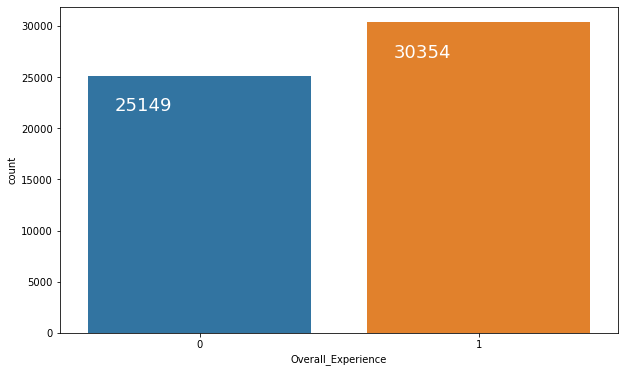

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Overall_Experience', data=dfjoin1_na)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [9]:
data = dfjoin1_na

In [10]:
data.isnull().sum()

Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
dtype: int64

In [11]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('Overall_Experience')
cols

['Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Overall_Experience']

In [12]:
for i in cols:
    data[i] = data[i].astype('category')
data[i].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,55503.0,39.403203,15.084985,7.0,27.0,40.0,51.0,85.0
Travel_Distance,55503.0,1979.200079,1030.538121,50.0,1357.0,1920.0,2535.0,6950.0
Departure_Delay_in_Mins,55503.0,14.788029,37.995164,0.0,0.0,0.0,12.0,1017.0
Arrival_Delay_in_Mins,55503.0,15.203827,38.427522,0.0,0.0,0.0,13.0,1011.0


In [14]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

Age
Skew : -0.0


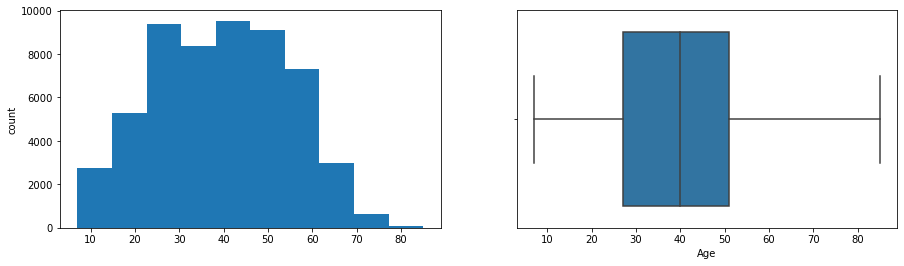

Travel_Distance
Skew : 0.49


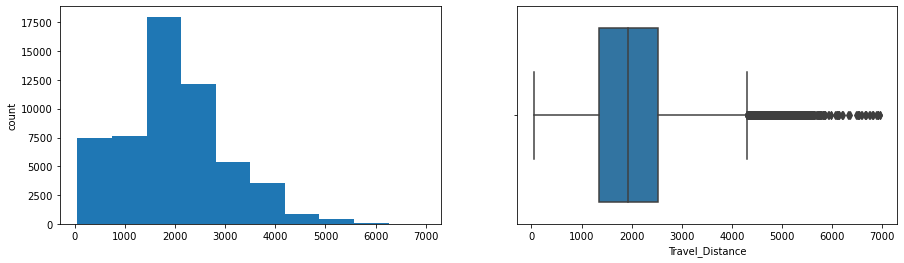

Departure_Delay_in_Mins
Skew : 6.12


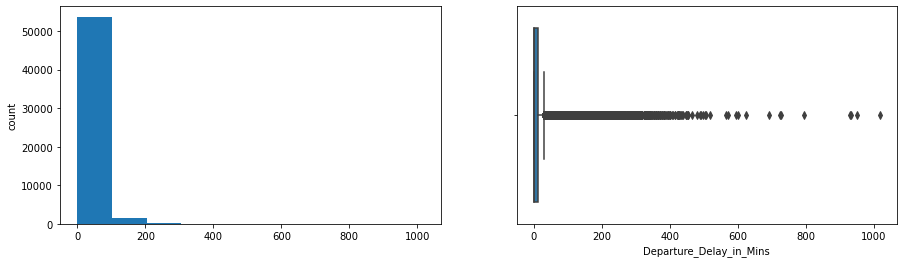

Arrival_Delay_in_Mins
Skew : 6.02


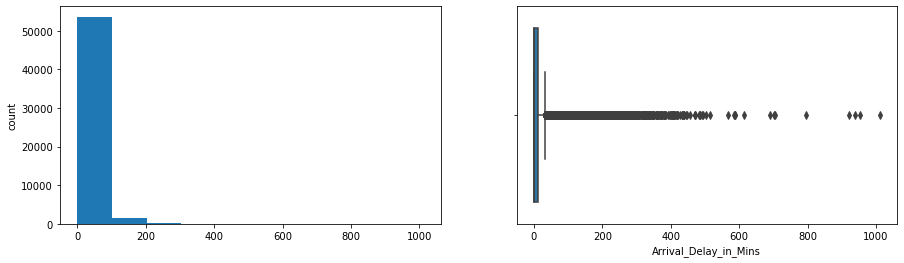

In [15]:
for col in ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

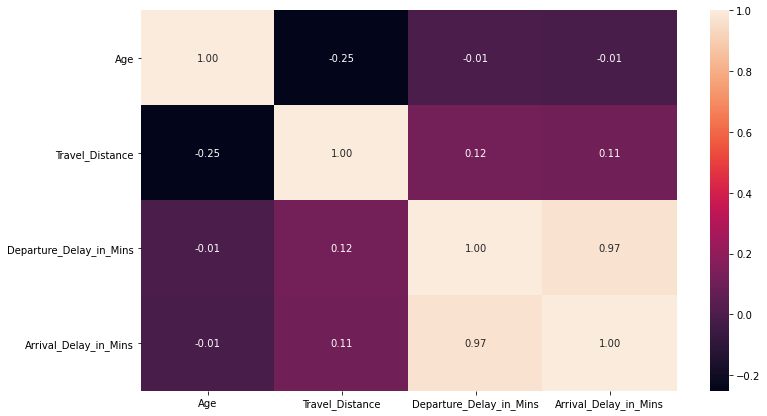

In [16]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [17]:
#Separating target variable and other variables
X=data.drop(columns='Overall_Experience')
Y=data['Overall_Experience']

In [18]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [19]:
X_train = X
y_train = Y

In [20]:
dfjoin2_na = dfjoin2.dropna()
dfjoin2_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20962 entries, 1 to 35600
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       20962 non-null  int64  
 1   Seat_Comfort             20962 non-null  object 
 2   Seat_Class               20962 non-null  object 
 3   Arrival_Time_Convenient  20962 non-null  object 
 4   Catering                 20962 non-null  object 
 5   Platform_Location        20962 non-null  object 
 6   Onboard_Wifi_Service     20962 non-null  object 
 7   Onboard_Entertainment    20962 non-null  object 
 8   Online_Support           20962 non-null  object 
 9   Ease_of_Online_Booking   20962 non-null  object 
 10  Onboard_Service          20962 non-null  object 
 11  Legroom                  20962 non-null  object 
 12  Baggage_Handling         20962 non-null  object 
 13  CheckIn_Service          20962 non-null  object 
 14  Cleanliness           

In [21]:
dfjoin2_na.nunique()

ID                         20962
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              5
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 5
Ease_of_Online_Booking         6
Onboard_Service                5
Legroom                        6
Baggage_Handling               5
CheckIn_Service                5
Cleanliness                    5
Online_Boarding                6
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             4267
Departure_Delay_in_Mins      312
Arrival_Delay_in_Mins        323
dtype: int64

In [22]:
dfjoin2_na.drop(["ID"], axis=1, inplace=True)
X_test = dfjoin2_na

In [23]:
X_test = data.drop(columns='Overall_Experience')
y_test = data['Overall_Experience']

In [24]:
X_test = pd.get_dummies(X, drop_first=True)

In [25]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [26]:
dt = DecisionTreeClassifier(class_weight={0:0.45, 1:0.55})
dt.fit (X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.45, 1: 0.55})

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25149
           1       1.00      1.00      1.00     30354

    accuracy                           1.00     55503
   macro avg       1.00      1.00      1.00     55503
weighted avg       1.00      1.00      1.00     55503



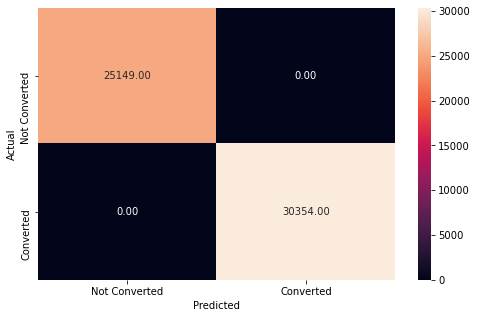

In [27]:
y_train_pred_dt=dt.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25149
           1       1.00      1.00      1.00     30354

    accuracy                           1.00     55503
   macro avg       1.00      1.00      1.00     55503
weighted avg       1.00      1.00      1.00     55503



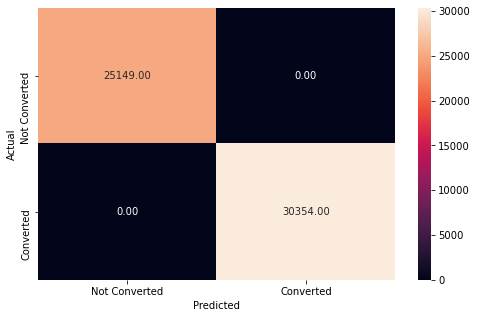

In [28]:
y_test_pred_dt=dt.predict(X_test)
metrics_score(y_test,y_test_pred_dt)

In [29]:
# Choose the type of classifier 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.45,1:0.55}, random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
gridCV= GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=10)
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data 
dtree_estimator.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.45, 1: 0.55}, criterion='entropy',
                       max_depth=5, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     25149
           1       0.85      0.91      0.88     30354

    accuracy                           0.87     55503
   macro avg       0.87      0.86      0.86     55503
weighted avg       0.87      0.87      0.86     55503



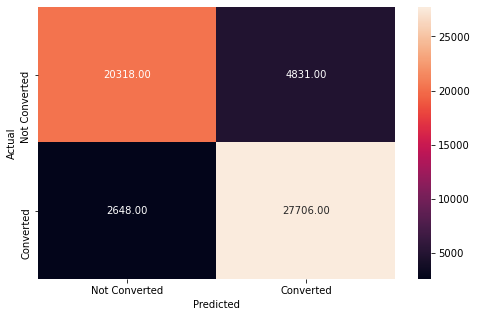

In [30]:
y_train_pred_dt=dtree_estimator.predict(X_train)
metrics_score(y_train,y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     25149
           1       0.85      0.91      0.88     30354

    accuracy                           0.87     55503
   macro avg       0.87      0.86      0.86     55503
weighted avg       0.87      0.87      0.86     55503



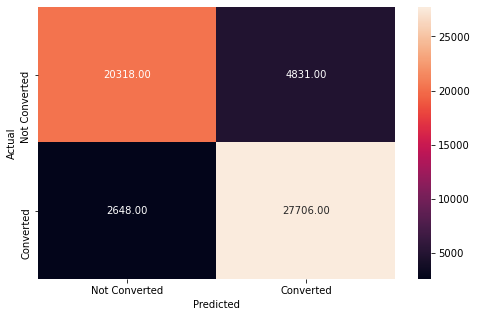

In [31]:
y_test_pred_dt=dtree_estimator.predict(X_test)
metrics_score(y_test,y_test_pred_dt)

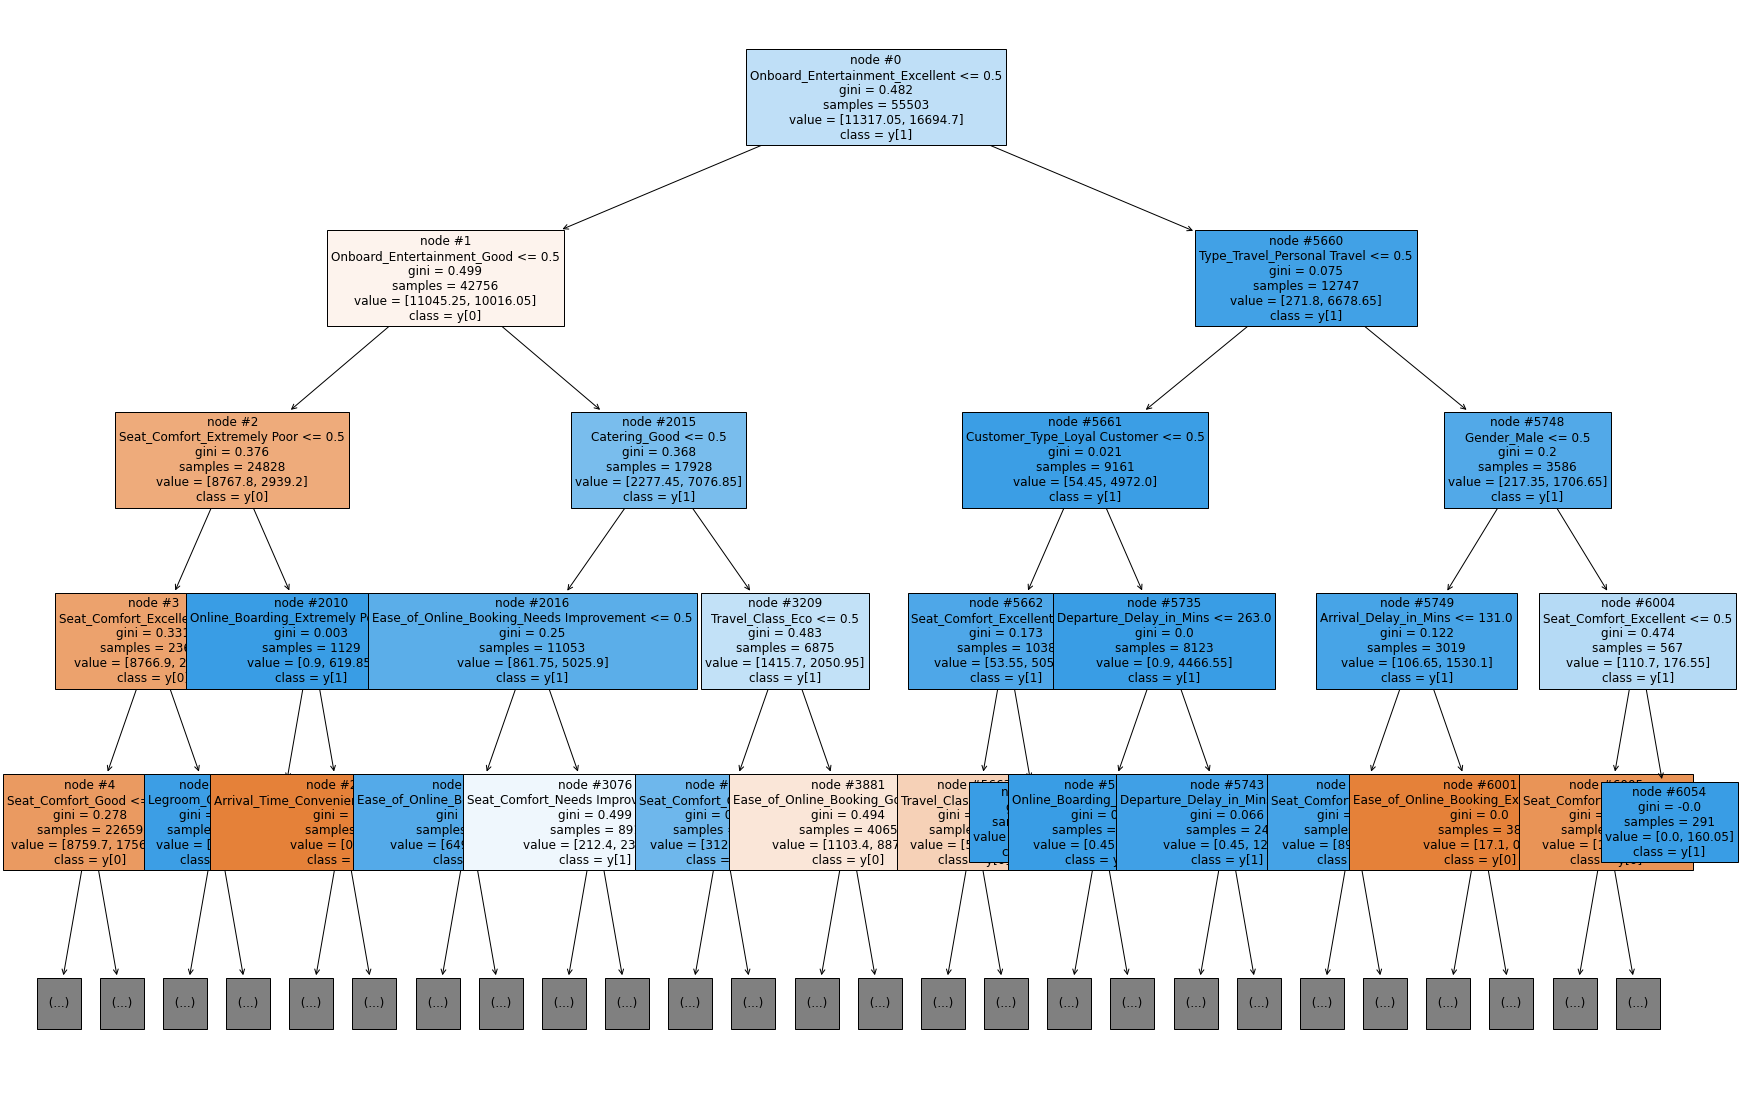

In [32]:
features = list(X.columns)

plt.figure(figsize=(30,20))

tree.plot_tree(dt,max_depth=4,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

In [33]:
rf_estimator = RandomForestClassifier(class_weight={0:0.45,1:0.55}, random_state=1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.45, 1: 0.55}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25149
           1       1.00      1.00      1.00     30354

    accuracy                           1.00     55503
   macro avg       1.00      1.00      1.00     55503
weighted avg       1.00      1.00      1.00     55503



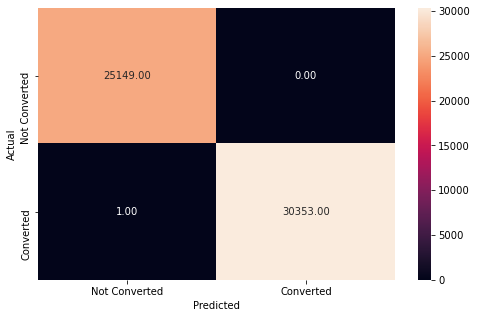

In [34]:
y_pred_train = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25149
           1       1.00      1.00      1.00     30354

    accuracy                           1.00     55503
   macro avg       1.00      1.00      1.00     55503
weighted avg       1.00      1.00      1.00     55503



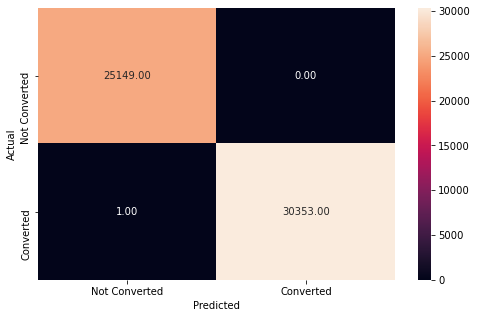

In [35]:
y_pred_test = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test)

In [ ]:
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.45,1:0.55}, random_state=1)

# Grid of parameters to choose from
## add from article
params_rf = {  
        "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1),
        "max_features": [0.7,0.9,'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

In [ ]:
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

In [ ]:
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
importances = rf_estimator_tuned.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)